# Wprowadzenie

Skrypt pokazuje jak użyć pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [2]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [11]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

# Wczytanie danych

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Wyświetlenie przykładowych cyfr

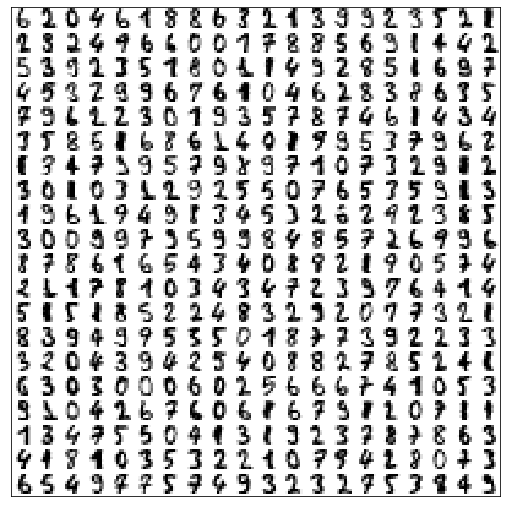

In [9]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

# Rzut na dwie losowo wybrane osie

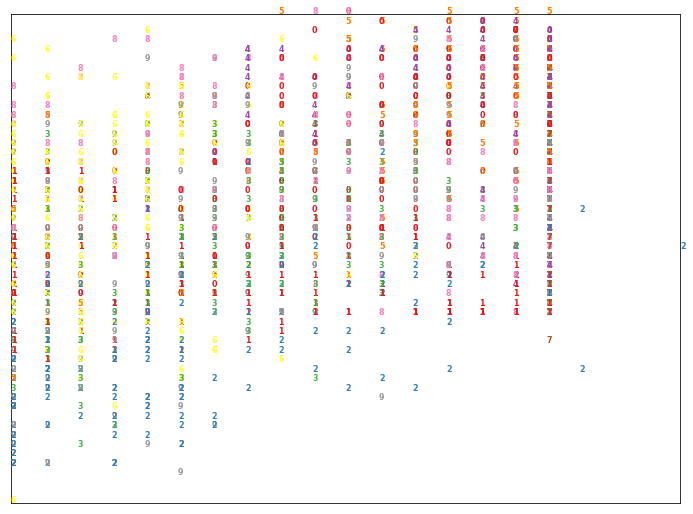

In [17]:
X_projected = random_projection.SparseRandomProjection(n_components=2,density=0.05).fit_transform(X)
plot_digits(X_projected, digits.target)

# Principal Component Analysis (PCA)

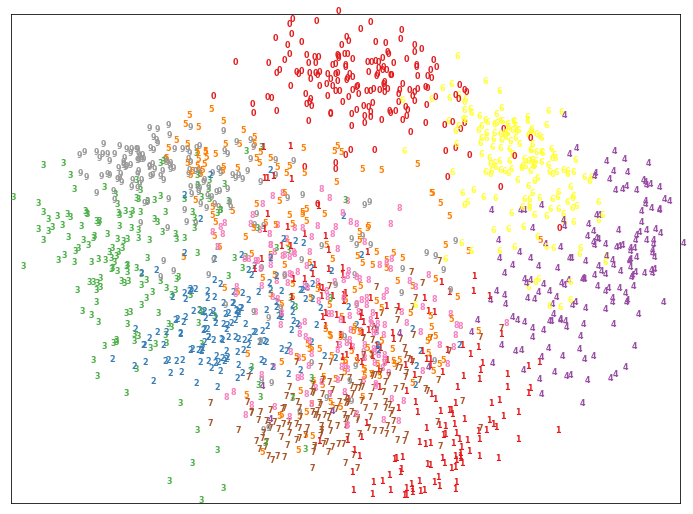

In [18]:
X_pca = decomposition.PCA(n_components=2,svd_solver='full').fit_transform(X)
plot_digits(X_pca, digits.target)

# Kernel Principal Component Analysis (KPCA)

Linear daje taki wynik jak zwykłe PCA

Sigmoid nie działa

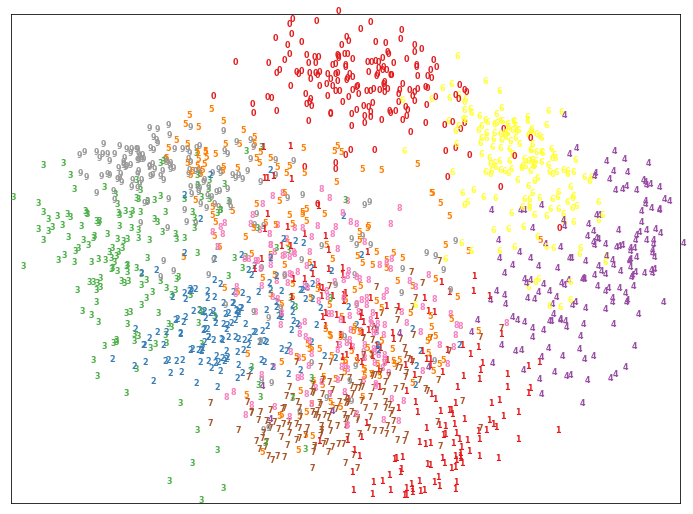

In [57]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="linear", gamma=1000).fit_transform(X)
plot_digits(X_kpca, digits.target)

# Isomap

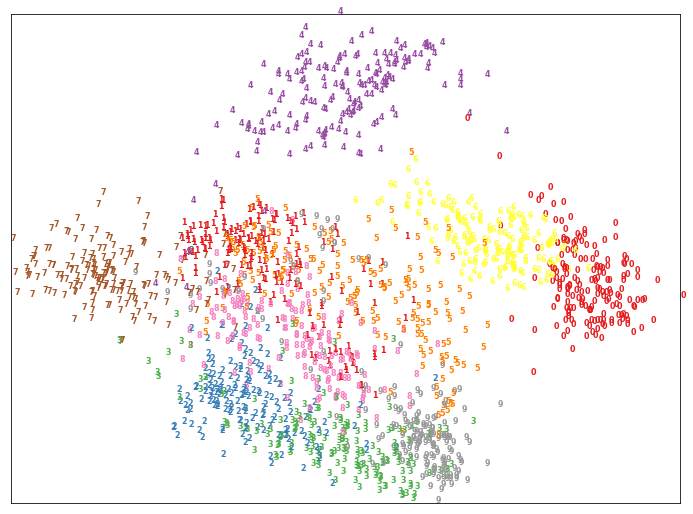

In [36]:
X_iso = manifold.Isomap(30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

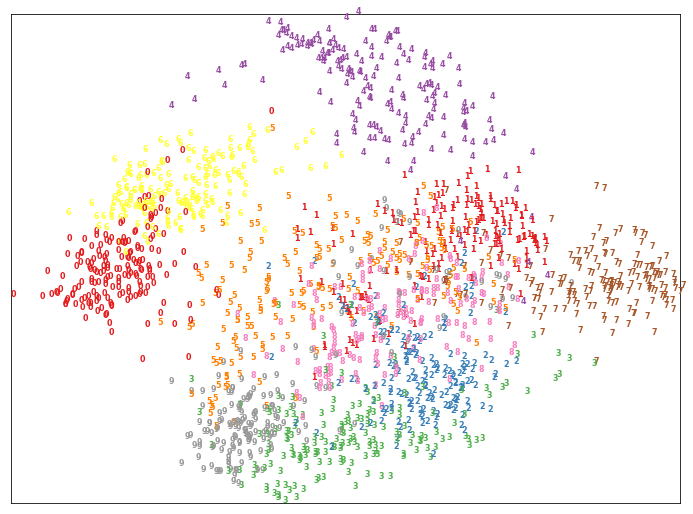

In [35]:
X_iso = manifold.Isomap(50, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

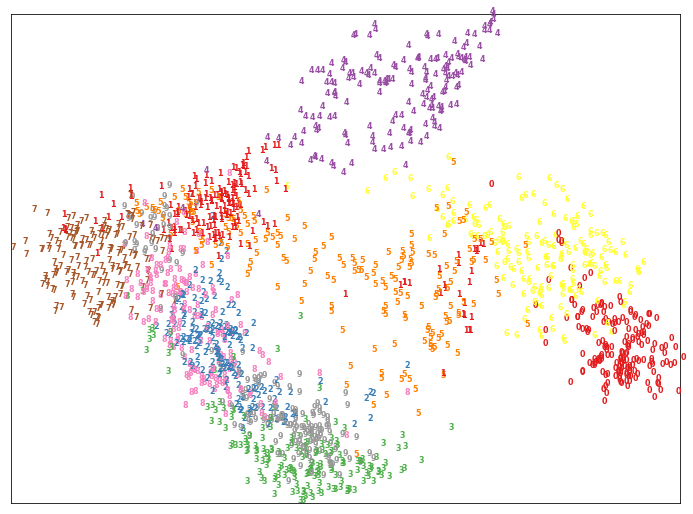

In [37]:
X_iso = manifold.Isomap(10, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

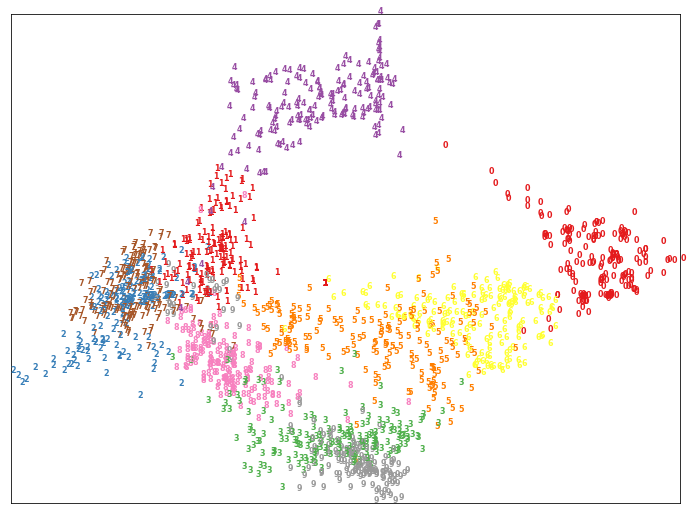

In [39]:
X_iso = manifold.Isomap(5, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

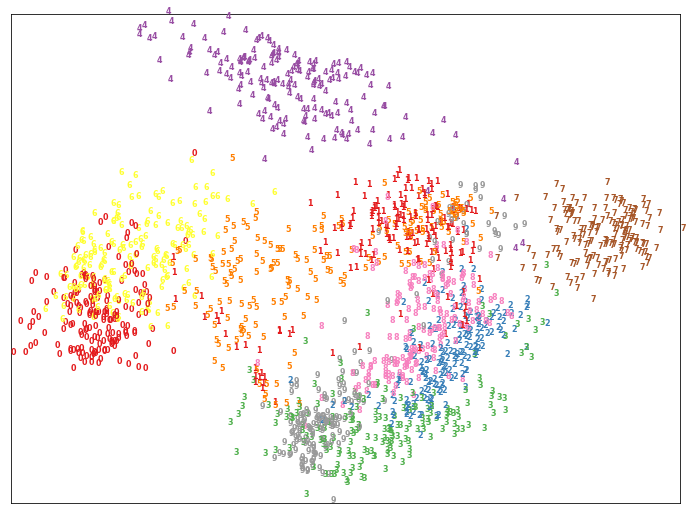

In [40]:
X_iso = manifold.Isomap(15, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

# Locally Linear Embedding (LLE)

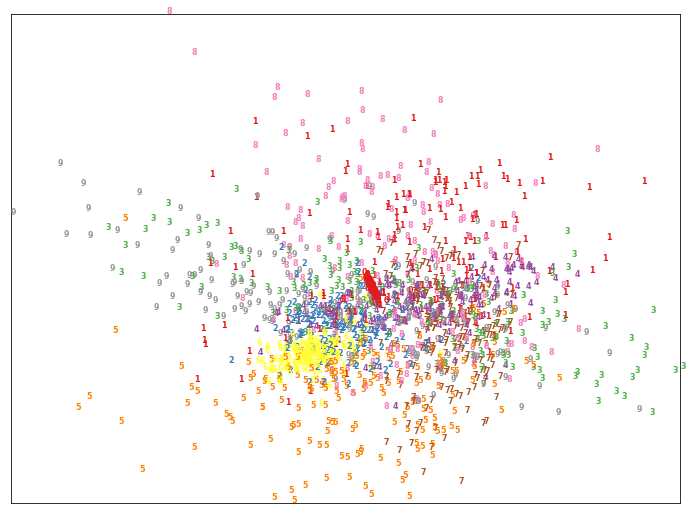

In [41]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

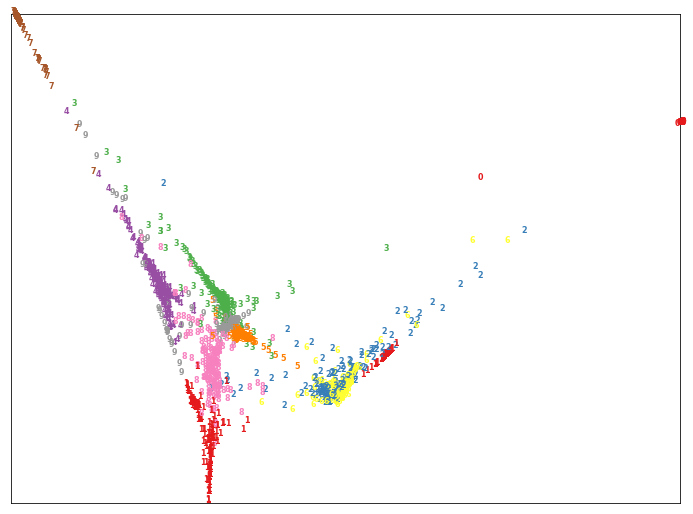

In [42]:
X_lle = manifold.LocallyLinearEmbedding(10, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

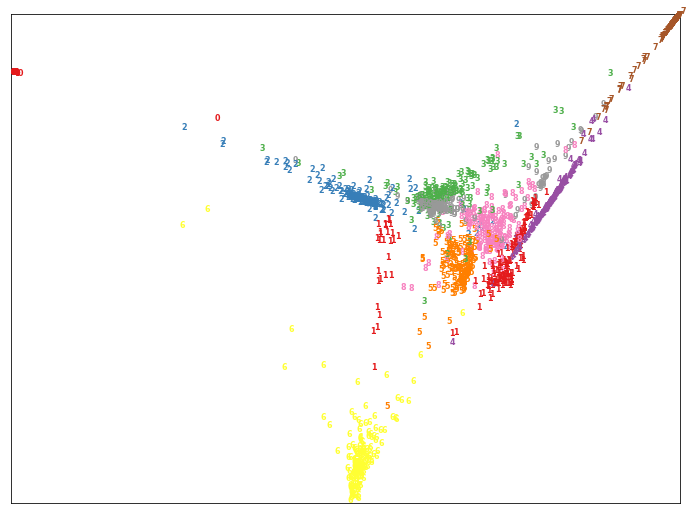

In [49]:
X_lle = manifold.LocallyLinearEmbedding(12, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

# Multidimensional Scaling (MDS)

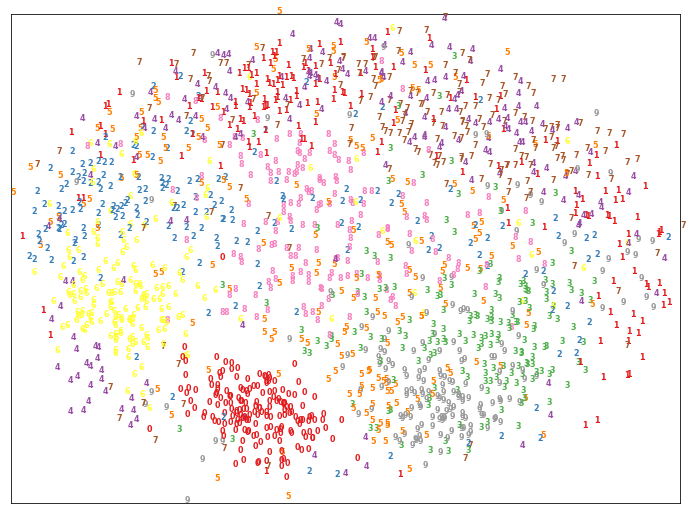

In [50]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100, metric=True).fit_transform(X)
plot_digits(X_mds, digits.target)

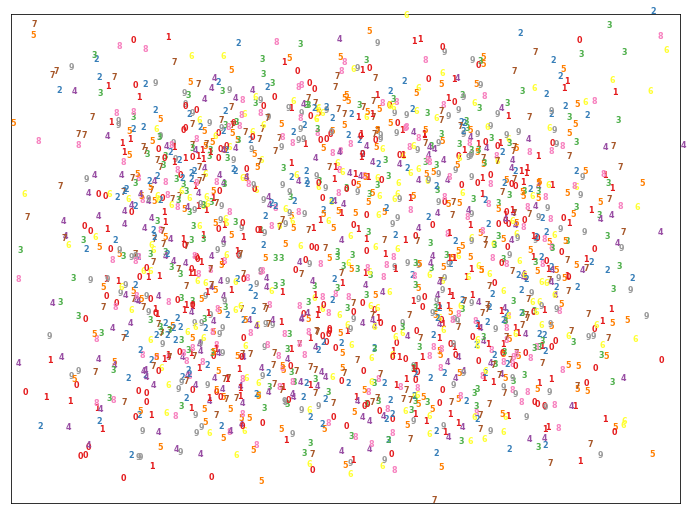

In [51]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100, metric=False).fit_transform(X)
plot_digits(X_mds, digits.target)

# t-distributed Stochastic Neighbor Embedding (t-SNE)

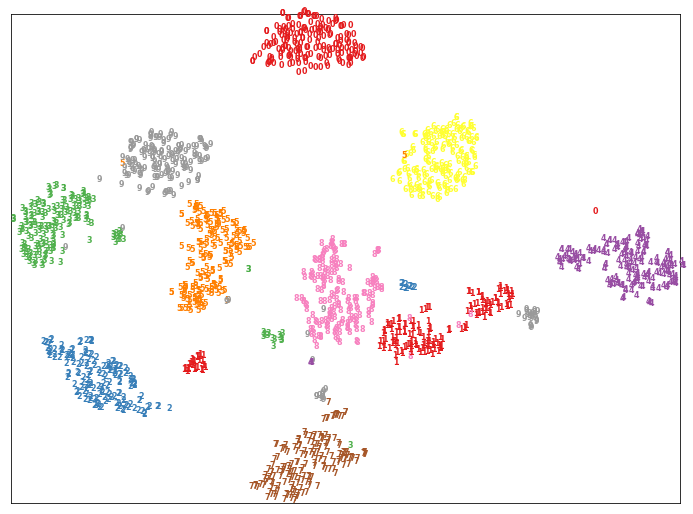

In [52]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

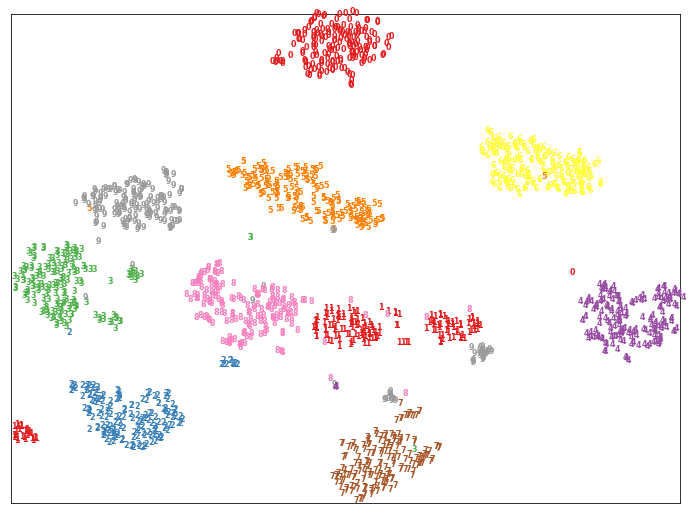

In [53]:
X_tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=1000).fit_transform(X)
plot_digits(X_tsne, digits.target)

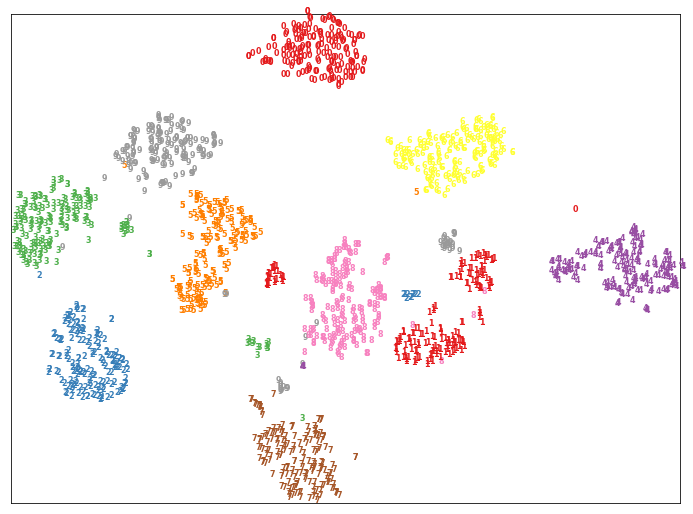

In [54]:
X_tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=20).fit_transform(X)
plot_digits(X_tsne, digits.target)

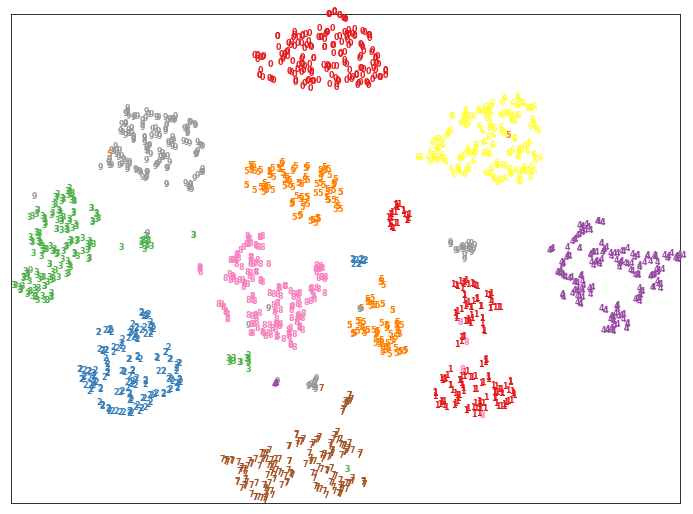

In [55]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=10).fit_transform(X)
plot_digits(X_tsne, digits.target)

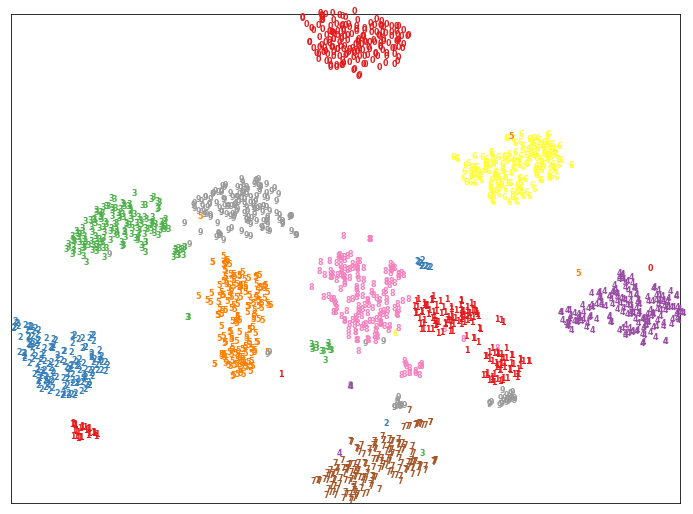

In [56]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=50).fit_transform(X)
plot_digits(X_tsne, digits.target)